In [0]:
#下載並安裝相關程式
!git clone https://github.com/koreal6803/Stocker.git
!pip install -r Stocker/requirements.txt

fatal: destination path 'Stocker' already exists and is not an empty directory.


In [0]:
import pandas as pd
#刪除警告
import warnings
warnings.filterwarnings('ignore')

#讀入台積電股價
df = pd.read_csv('Stocker/price.csv', index_col='date', parse_dates=['date'])
price = df.squeeze()
price.head()

date
2000-01-04    178.0
2000-01-05    182.0
2000-01-06    178.0
2000-01-07    173.0
2000-01-10    179.0
Name:  price, dtype: float64

In [0]:
print(df)
print(df.squeeze)

             price
date              
2000-01-04   178.0
2000-01-05   182.0
2000-01-06   178.0
2000-01-07   173.0
2000-01-10   179.0
2000-01-11   176.0
2000-01-12   181.0
2000-01-13   178.0
2000-01-14   182.0
2000-01-15   188.0
2000-01-17   187.0
2000-01-18   184.0
2000-01-19   184.0
2000-01-20   182.0
2000-01-21   186.0
2000-01-24   188.0
2000-01-25   193.0
2000-01-26   206.0
2000-01-27   208.0
2000-01-28   204.0
2000-01-29   200.0
2000-01-31   203.0
2000-02-01   202.0
2000-02-09   211.0
2000-02-10   214.0
2000-02-11   219.0
2000-02-14   214.0
2000-02-15   215.0
2000-02-16   213.0
2000-02-17   211.0
...            ...
2018-07-11   220.0
2018-07-12   220.5
2018-07-13   224.5
2018-07-16   223.5
2018-07-17   221.5
2018-07-18   223.0
2018-07-19   224.5
2018-07-20   237.5
2018-07-23   241.0
2018-07-24   241.0
2018-07-25   240.5
2018-07-26   241.0
2018-07-27   244.5
2018-07-30   245.5
2018-07-31   246.0
2018-08-01   248.0
2018-08-02   244.5
2018-08-03   247.0
2018-08-06   245.5
2018-08-07  

In [0]:
#開始使用時間序列預測模型Prophet，中文叫作預言家
from Stocker.stocker import Stocker
tsmc = Stocker(price)

#擁有18年的每日股票數據

the stock Stocker Initialized. Data covers 2000-01-04 00:00:00 to 2018-08-21 00:00:00.


Maximum Adj. Close = 266.00 on 2018-01-23 00:00:00.
Minimum Adj. Close = 35.60 on 2002-10-08 00:00:00.
Current Adj. Close = 241.00 on 2018-08-21.



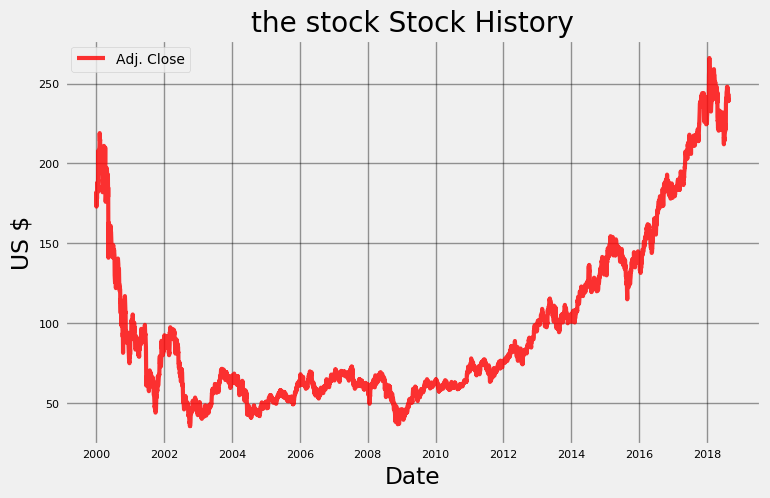

In [0]:
#繪製歷史股價圖
tsmc.plot_stock()

Predicted Price on 2018-11-19 00:00:00 = $276.26


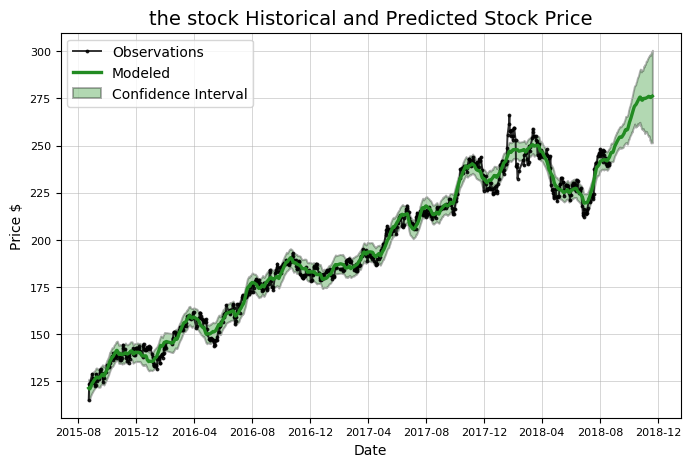

In [0]:
#預言股價中期走勢
model, model_data = tsmc.create_prophet_model(days=90)


Prediction Range: 2017-08-21 00:00:00 to 2018-08-21 00:00:00.

Predicted price on 2018-08-18 00:00:00 = $251.86.
Actual price on    2018-08-17 00:00:00 = $239.50.

Average Absolute Error on Training Data = $2.09.
Average Absolute Error on Testing  Data = $15.29.

When the model predicted an increase, the price increased 48.77% of the time.
When the model predicted a  decrease, the price decreased  48.19% of the time.

The actual value was within the 80% confidence interval 83.74% of the time.


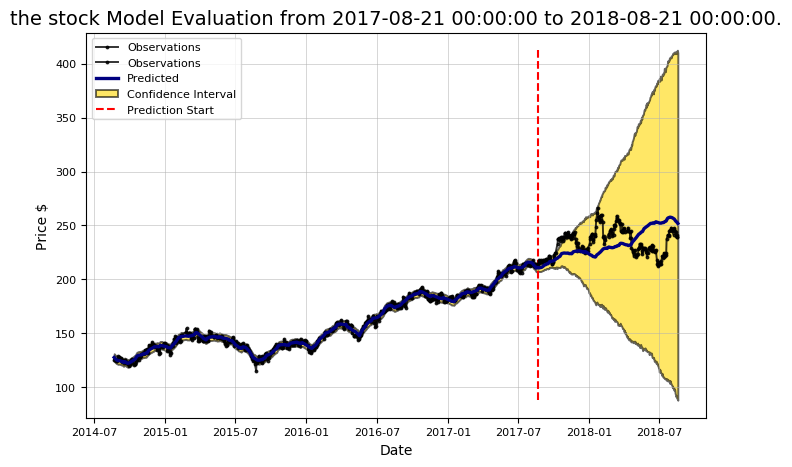

In [0]:
#評估預測與真實的結果差異
tsmc.evaluate_prediction()

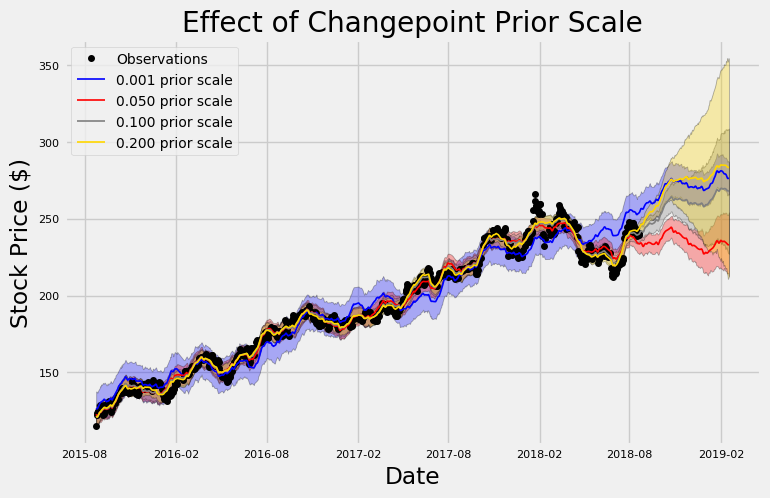

In [0]:
#同時預測短中長期股價
tsmc.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Predicted Increase: 

          Date    estimate    change       upper       lower
1   2018-08-22  244.637193  0.686234  249.669475  239.661345
2   2018-08-23  245.419203  0.782010  250.423001  240.257592
3   2018-08-24  246.085432  0.666229  250.923245  241.452977
5   2018-08-26  246.428856  0.343424  251.566599  241.617400
7   2018-08-28  246.427289  0.108304  251.603404  241.292890
8   2018-08-29  246.949894  0.522605  251.787359  241.830360
9   2018-08-30  247.818390  0.868496  252.753845  242.824943
10  2018-08-31  248.773709  0.955319  253.608877  243.756088
12  2018-09-02  250.148201  1.374492  255.253461  245.201031
13  2018-09-03  250.606249  0.458048  255.782192  245.646764
14  2018-09-04  251.085048  0.478798  256.393177  246.109609
15  2018-09-05  251.628185  0.543137  256.788422  246.771037
16  2018-09-06  252.177281  0.549097  257.263530  247.289550
17  2018-09-07  252.666211  0.488930  257.897139  247.566239
19  2018-09-09  253.538394  0.872183  258.918702  248.631908
2

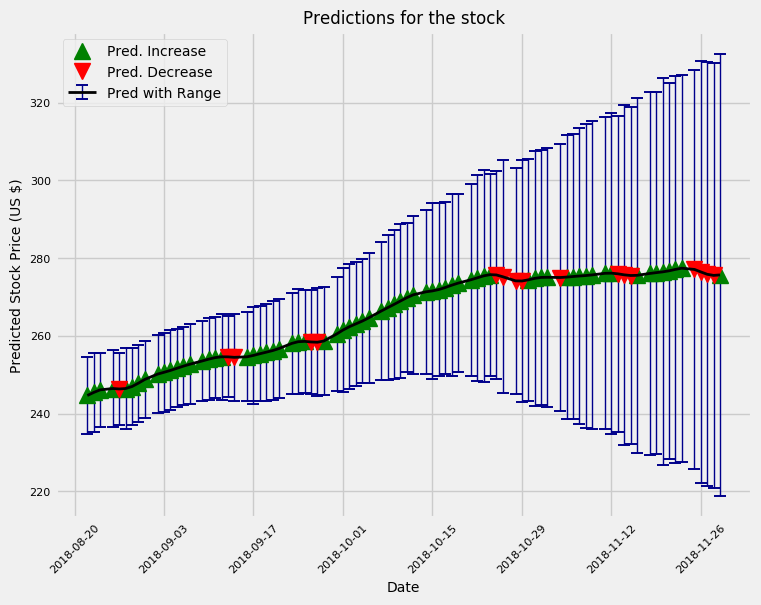

In [0]:
#預測中期股價及區間
tsmc.predict_future(days=100)